# Sao Paulo Real Estate - Rent

#### Importing our dataset

In [1]:
import pandas as pd
import numpy as np
housing = pd.read_csv("dataset.csv")

In [2]:
housing.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation_Type,Property Type,Latitude,Longitude,Price
0,220,47,2,2.0,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486,930
1,148,45,2,2.0,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718,1000
2,100,48,2,2.0,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665,1000
3,200,48,2,2.0,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014,1000
4,410,55,2,2.0,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436,1300


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Condo             13640 non-null  int64  
 1   Size              13640 non-null  int64  
 2   Rooms             13640 non-null  int64  
 3   Toilets           13635 non-null  float64
 4   Suites            13640 non-null  int64  
 5   Parking           13640 non-null  int64  
 6   Elevator          13640 non-null  int64  
 7   Furnished         13640 non-null  int64  
 8   Swimming Pool     13640 non-null  int64  
 9   New               13640 non-null  int64  
 10  District          13640 non-null  object 
 11  Negotiation_Type  13640 non-null  object 
 12  Property Type     13640 non-null  object 
 13  Latitude          13640 non-null  float64
 14  Longitude         13640 non-null  float64
 15  Price             13640 non-null  int64  
dtypes: float64(3), int64(10), object(3)
memo

In [4]:
housing.dtypes

Condo                 int64
Size                  int64
Rooms                 int64
Toilets             float64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation_Type     object
Property Type        object
Latitude            float64
Longitude           float64
Price                 int64
dtype: object

#### Cheaking for missing valus

In [5]:
housing.isnull().sum()

Condo               0
Size                0
Rooms               0
Toilets             5
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation_Type    0
Property Type       0
Latitude            0
Longitude           0
Price               0
dtype: int64

In [6]:
housing.shape

(13640, 16)

#### Checking values for negotition types

In [7]:
housing['Negotiation_Type'].value_counts()

rent    7228
sale    6412
Name: Negotiation_Type, dtype: int64

##### Spliting city from district

In [8]:
housing[['District', 'City']] = housing['District'].str.split('/', expand= True)

In [9]:
housing.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation_Type,Property Type,Latitude,Longitude,Price,City
0,220,47,2,2.0,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.543138,-46.479486,930,São Paulo
1,148,45,2,2.0,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.550239,-46.480718,1000,São Paulo
2,100,48,2,2.0,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.542818,-46.485665,1000,São Paulo
3,200,48,2,2.0,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.547171,-46.483014,1000,São Paulo
4,410,55,2,2.0,1,1,1,0,0,0,Artur Alvim,rent,apartment,-23.525025,-46.482436,1300,São Paulo


In [10]:
housing.describe()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Price
count,13640.000000,13640.000000,13640.000000,13635.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000,1.364000e+04
mean,689.882331,84.373900,2.312023,2.073707,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088,2.877378e+05
std,757.649363,58.435676,0.777461,0.961902,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288,5.908214e+05
min,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352,4.800000e+02
25%,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671,1.858750e+03
50%,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255,8.100000e+03
75%,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040,3.600000e+05
max,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000e+07


In [11]:
ab = ['City', 'Property Type']
housing.drop(ab, axis=1, inplace=True)
housing.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation_Type,Latitude,Longitude,Price
0,220,47,2,2.0,1,1,0,0,0,0,Artur Alvim,rent,-23.543138,-46.479486,930
1,148,45,2,2.0,1,1,0,0,0,0,Artur Alvim,rent,-23.550239,-46.480718,1000
2,100,48,2,2.0,1,1,0,0,0,0,Artur Alvim,rent,-23.542818,-46.485665,1000
3,200,48,2,2.0,1,1,0,0,0,0,Artur Alvim,rent,-23.547171,-46.483014,1000
4,410,55,2,2.0,1,1,1,0,0,0,Artur Alvim,rent,-23.525025,-46.482436,1300


#### Ploting apartment number for sale or rent

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Status')

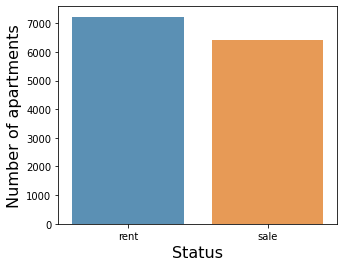

In [13]:
plt.figure(figsize = (5, 4))
ax = sns.countplot(x = 'Negotiation_Type', data= housing, alpha= 0.8)
ax.set_ylabel('Number of apartments', fontsize= 16)
ax.set_xlabel('Status', fontsize= 16)

#### Spliting rent data from the main dataset

In [14]:
housing_rent = housing[housing['Negotiation_Type'] == 'rent']

housing_rent.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation_Type,Latitude,Longitude,Price
0,220,47,2,2.0,1,1,0,0,0,0,Artur Alvim,rent,-23.543138,-46.479486,930
1,148,45,2,2.0,1,1,0,0,0,0,Artur Alvim,rent,-23.550239,-46.480718,1000
2,100,48,2,2.0,1,1,0,0,0,0,Artur Alvim,rent,-23.542818,-46.485665,1000
3,200,48,2,2.0,1,1,0,0,0,0,Artur Alvim,rent,-23.547171,-46.483014,1000
4,410,55,2,2.0,1,1,1,0,0,0,Artur Alvim,rent,-23.525025,-46.482436,1300


In [15]:
housing_rent.shape

(7228, 15)

In [16]:
housing_rent.describe()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Price
count,7228.000000,7228.000000,7228.000000,7223.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,825.194798,89.486165,2.304234,2.105635,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873,3077.669065
std,835.621937,63.976416,0.829108,0.998365,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070,3522.830284
min,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352,480.000000
25%,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788,1350.000000
50%,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793,2000.000000
75%,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110,3300.000000
max,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50000.000000


In [17]:
housing_rent.keys()

Index(['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator',
       'Furnished', 'Swimming Pool', 'New', 'District', 'Negotiation_Type',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

#### Converting array to data fream

In [18]:
housing = pd.DataFrame(housing_rent, columns= housing_rent.keys())

#### Droping Unnecessary Attributs

In [19]:
att = ['District', 'Negotiation_Type', 'Latitude', 'Longitude']

housing.drop(att, axis=1, inplace= True)

In [20]:
housing.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Price
0,220,47,2,2.0,1,1,0,0,0,0,930
1,148,45,2,2.0,1,1,0,0,0,0,1000
2,100,48,2,2.0,1,1,0,0,0,0,1000
3,200,48,2,2.0,1,1,0,0,0,0,1000
4,410,55,2,2.0,1,1,1,0,0,0,1300


#### Ploting rent data

array([[<AxesSubplot:title={'center':'Condo'}>,
        <AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'Rooms'}>],
       [<AxesSubplot:title={'center':'Toilets'}>,
        <AxesSubplot:title={'center':'Suites'}>,
        <AxesSubplot:title={'center':'Parking'}>],
       [<AxesSubplot:title={'center':'Elevator'}>,
        <AxesSubplot:title={'center':'Furnished'}>,
        <AxesSubplot:title={'center':'Swimming Pool'}>],
       [<AxesSubplot:title={'center':'New'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

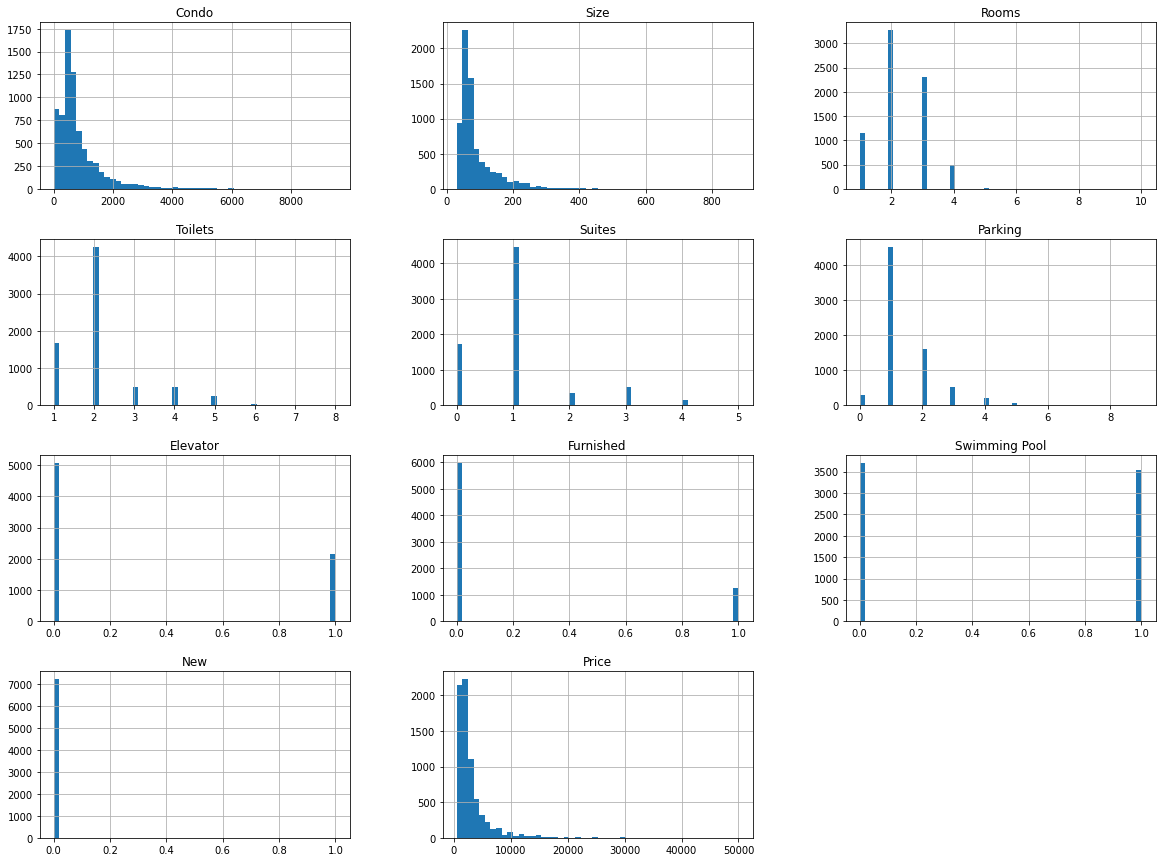

In [21]:
housing.hist(bins= 50, figsize= (20, 15))

#### Train-Test Spliting
Spliting Mannualy

In [22]:
def split_train_test(data, test_ratio):
    np.random.seed(0)
    shuffled = np.random.permutation(len(data))
#    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [23]:
# train_set, test_set = split_train_test(housing_rent, 0.2)

Spliting using sklearn

In [24]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size= 0.2, random_state= 0)

In [25]:
print(f"Rows in Train set: {len(train_set)}\nRows in Test set: {len(test_set)}")

Rows in Train set: 5782
Rows in Test set: 1446


#### Looking for Correlations

In [26]:
corr_matrex = housing.corr()

In [27]:
corr_matrex['Price'].sort_values(ascending= False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583531
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Name: Price, dtype: float64

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Size', ylabel='Price'>,
        <AxesSubplot:xlabel='Condo', ylabel='Price'>,
        <AxesSubplot:xlabel='New', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='Size'>,
        <AxesSubplot:xlabel='Size', ylabel='Size'>,
        <AxesSubplot:xlabel='Condo', ylabel='Size'>,
        <AxesSubplot:xlabel='New', ylabel='Size'>],
       [<AxesSubplot:xlabel='Price', ylabel='Condo'>,
        <AxesSubplot:xlabel='Size', ylabel='Condo'>,
        <AxesSubplot:xlabel='Condo', ylabel='Condo'>,
        <AxesSubplot:xlabel='New', ylabel='Condo'>],
       [<AxesSubplot:xlabel='Price', ylabel='New'>,
        <AxesSubplot:xlabel='Size', ylabel='New'>,
        <AxesSubplot:xlabel='Condo', ylabel='New'>,
        <AxesSubplot:xlabel='New', ylabel='New'>]], dtype=object)

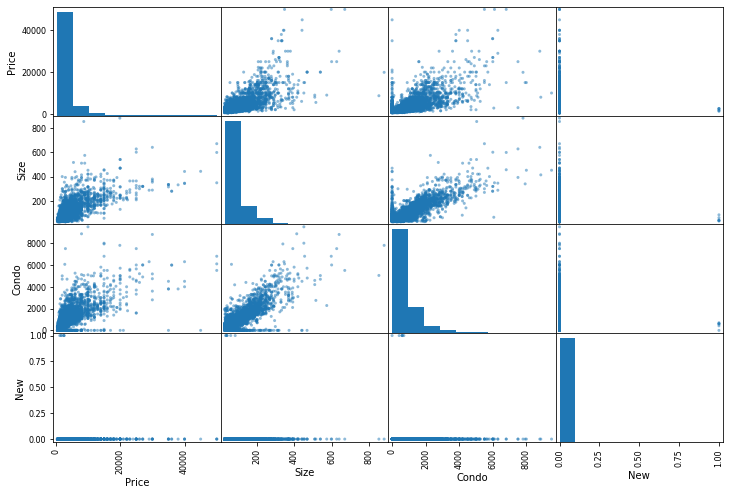

In [28]:
from pandas.plotting import scatter_matrix

plotting_attributes = ["Price", "Size", "Condo", "New"]
scatter_matrix(housing[plotting_attributes], figsize= (12, 8))

#### Spliting label and other attributs

In [29]:
housing_tr = housing.drop("Price", axis= 1)
housing_labels = housing['Price'].copy()

#### Creating a pipeline
Using Standerd Scaler 

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= "median")),
    ('std_scaler', StandardScaler()),
])

In [31]:
housing_tr_num = my_pipeline.fit_transform(housing_tr)

In [32]:
housing_tr_num.shape

(7228, 10)

#### Selecting model for prediction

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = LinearRegression()
# model = DecisionTreeRegressor()
# model = RandomForestRegressor()

model.fit(housing_tr_num, housing_labels)

LinearRegression()

In [34]:
some_data = housing_tr.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [35]:
prepard_data = my_pipeline.transform(some_data)

In [36]:
model.predict(prepard_data)

array([1053.20357794,  933.23641413,  975.62126599, 1063.80453128,
       1381.65696992])

In [37]:
list(some_labels)

[930, 1000, 1000, 1000, 1300]

#### Evaluating the model

In [38]:
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_tr_num)

mse = mean_squared_error(housing_labels, housing_predictions)

rmse = np.sqrt(mse)

In [39]:
rmse

2179.7909404952597

Using Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, housing_tr_num, housing_labels, scoring= 'neg_mean_squared_error', cv= 10)

rmse_scores = np.sqrt(-scores)

In [41]:
rmse_scores

array([1973.05047989, 2637.73277325, 1660.08071632, 1654.71676024,
       1970.71869212, 3528.42711223, 1870.40054387, 1607.36804927,
       1761.54887708, 2615.08585723])

In [42]:
def print_scores(scores):
    print(f"Scores: {scores}\nMean: {scores.mean()}\nStandard deviation: {scores.std()}")

In [43]:
print_scores(rmse_scores)

Scores: [1973.05047989 2637.73277325 1660.08071632 1654.71676024 1970.71869212
 3528.42711223 1870.40054387 1607.36804927 1761.54887708 2615.08585723]
Mean: 2127.9129861488464
Standard deviation: 584.950419390992


#### Saving the model

In [44]:
from joblib import dump, load
dump(model, "Prediction.joblib")

['Prediction.joblib']

#### Testing the model

In [45]:
X_test = test_set.drop('Price', axis=1)
Y_test = test_set["Price"].copy()
X_test_prepared = my_pipeline.transform(X_test)

final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [46]:
final_rmse

2137.8671749060527

In [47]:
prepard_data[0]

array([-0.72429485, -0.66413699, -0.36696596, -0.1057781 , -0.02769583,
       -0.5084679 , -0.65435178, -0.45727457, -0.97620985, -0.02882351])